In [1]:
# import requisite libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from nepali.datetime import nepalidate, parser
pd.Series.__unicode__ = pd.Series.to_string
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
data = pd.read_excel("input/TotalBillLIst_CTSCAN_2078_poush_to_2079Poush.xlsx",skiprows= 4)
data.head()

,Date,Receipt No.,BillingType,VisitType,Hospital No.,Patient Name,Department,Item,Price,Qty,SubTotal,Discount,Total,User Name,Performer,Prescriber,Remarks,ReferenceReceiptNo,Disc. Scheme,IsInsurance?
0,2078-09-07 00:00:00,CRN-752,ReturnCashSales,outpatient,2103010197,Bhim Bahadur Thapa,CT-SCAN,HRCT CHEST,7000,1,7000,0.0,7000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,Dr. Badri Paudel,ct not done because of machine problem,BL-24565,General,NO
1,2078-09-08 00:00:00,BL-26047,CashSales,inpatient,2112018587,Amar Sing Gurung,CT-SCAN,HRCT Chest Covid-19,8000,1,8000,0.0,8000.0,Ms. SHRISHTI LAMCHHANE,Dr. Manish Kiran Shrestha,Dr. Klara Paudel,NaN,NaN,General,NO
2,2078-09-25 00:00:00,BL-28160,CashSales,outpatient,2201019409,Chandra Gurung,CT-SCAN,CT HEAD PLAIN,4000,1,4000,0.0,4000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,SELF,NaN,NaN,General,NO
3,2078-09-26 00:00:00,BL-28312,CashSales,outpatient,2201019405,Som Prasad Gurung,CT-SCAN,HRCT Chest Covid-19,8000,1,8000,0.0,8000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,Dr. Sharad Chandra Baral,NaN,NaN,General,NO
4,2078-09-26 00:00:00,BL-28247,CashSales,outpatient,2201019431,Tulasi Rana,CT-SCAN,HRCT CHEST,7000,1,7000,0.0,7000.0,Ms. DIPA LABHAJU,Dr. Manish Kiran Shrestha,Dr. Duty Doctor,NaN,NaN,General,NO


In [6]:
len(data['Prescriber'].unique())

47

In [4]:
data['Performer'].unique()

array(['Dr. Manish Kiran Shrestha', 'Dr. Lagika Shakya',
       'Dr. Om Kumar Shrestha', 'Dr. YASODA TRIPATHI',
       'Dr. Sapana Koirala', 'Unassigned'], dtype=object)

In [3]:
data['Department'] = data['Department'].str.upper()
data['Item'] = data['Item'].str.upper()
data['Performer'] = data['Performer'].str.title()
data['Prescriber'] = data['Prescriber'].str.title()
data['Patient Name'] = data['Patient Name'].str.title()
data['exp_name'] = data['Patient Name'].str.split()
data['Surname'] = data['exp_name'].str[-1]
data['Surname'] = data['Surname'].str.title()

data.head()

,Date,Receipt No.,BillingType,VisitType,Hospital No.,Patient Name,Department,Item,Price,Qty,...,Total,User Name,Performer,Prescriber,Remarks,ReferenceReceiptNo,Disc. Scheme,IsInsurance?,exp_name,Surname
0,2078-09-07 00:00:00,CRN-752,ReturnCashSales,outpatient,2103010197,Bhim Bahadur Thapa,CT-SCAN,HRCT CHEST,7000,1,...,7000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,Dr. Badri Paudel,ct not done because of machine problem,BL-24565,General,NO,"[Bhim, Bahadur, Thapa]",Thapa
1,2078-09-08 00:00:00,BL-26047,CashSales,inpatient,2112018587,Amar Sing Gurung,CT-SCAN,HRCT CHEST COVID-19,8000,1,...,8000.0,Ms. SHRISHTI LAMCHHANE,Dr. Manish Kiran Shrestha,Dr. Klara Paudel,NaN,NaN,General,NO,"[Amar, Sing, Gurung]",Gurung
2,2078-09-25 00:00:00,BL-28160,CashSales,outpatient,2201019409,Chandra Gurung,CT-SCAN,CT HEAD PLAIN,4000,1,...,4000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,Self,NaN,NaN,General,NO,"[Chandra, Gurung]",Gurung
3,2078-09-26 00:00:00,BL-28312,CashSales,outpatient,2201019405,Som Prasad Gurung,CT-SCAN,HRCT CHEST COVID-19,8000,1,...,8000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,Dr. Sharad Chandra Baral,NaN,NaN,General,NO,"[Som, Prasad, Gurung]",Gurung
4,2078-09-26 00:00:00,BL-28247,CashSales,outpatient,2201019431,Tulasi Rana,CT-SCAN,HRCT CHEST,7000,1,...,7000.0,Ms. DIPA LABHAJU,Dr. Manish Kiran Shrestha,Dr. Duty Doctor,NaN,NaN,General,NO,"[Tulasi, Rana]",Rana


In [4]:
data.dtypes

Date                   object
Receipt No.            object
BillingType            object
VisitType              object
Hospital No.            int64
Patient Name           object
Department             object
Item                   object
Price                   int64
Qty                     int64
SubTotal                int64
Discount              float64
Total                 float64
User Name              object
Performer              object
Prescriber             object
Remarks                object
ReferenceReceiptNo     object
Disc. Scheme           object
IsInsurance?           object
exp_name               object
Surname                object
dtype: object

In [5]:
data.columns

Index(['Date', 'Receipt No.', 'BillingType', 'VisitType', 'Hospital No.',
       'Patient Name', 'Department', 'Item', 'Price', 'Qty', 'SubTotal',
       'Discount', 'Total', 'User Name', 'Performer', 'Prescriber', 'Remarks',
       'ReferenceReceiptNo', 'Disc. Scheme', 'IsInsurance?', 'exp_name',
       'Surname'],
      dtype='object')

In [6]:
for cc in ['BillingType', 'VisitType','Department','Performer', 'Prescriber', 'Disc. Scheme', 'IsInsurance?']:
    print(cc)
    print(data[cc].unique())
    print("----------------------")

BillingType
['ReturnCashSales' 'CashSales' 'CreditSales' 'ReturnCreditSales']
----------------------
VisitType
['outpatient' 'inpatient' 'emergency']
----------------------
Department
['CT-SCAN']
----------------------
Performer
['Dr. Manish Kiran Shrestha' 'Dr. Lagika Shakya' 'Dr. Om Kumar Shrestha'
 'Dr. Yasoda Tripathi' 'Dr. Sapana Koirala' 'Unassigned']
----------------------
Prescriber
['Dr. Badri Paudel' 'Dr. Klara Paudel' 'Self' 'Dr. Sharad Chandra Baral'
 'Dr. Duty Doctor' 'Dr. Nabin Raj Gautam' 'Dr. Dipak Maharjan'
 'Dr. Bishnu Bhandari' 'Dr. Ranjuna Thakali' 'Dr. Prakash Chhetri'
 'Dr. Kovid Nepal' 'Dr. S K Jayswal' 'Dr. Pushpa Raj Koirala'
 'Dr. Pradeep Kafle' 'Dr. Saroj Pokhrel' 'Dr. Binod Raj Bhandari'
 'Dr. Subin Byanjankar' 'Dr. Dipendra Man Shrestha' 'Dr. Jamuna Gurung'
 'Dr. Santosh Adhikari' 'Dr. Kiran Sharma' 'Dr. Ashim Gurung'
 'Dr. Rajan Kumar Sharma' 'Dr. Manish Kiran Shrestha' 'Dr. Bishnu Palikhe'
 'Dr. Om Kumar Shrestha' 'Dr. Ananda Bhattarai' 'Dr. Jhapindra Pok

In [7]:
data = data.rename(columns = {'Date':'Date_Time'})


data['Date_Time'] = data['Date_Time'].astype('str')
yr = []
mt = []
yr_mt = []
dd = []
for tt in data['Date_Time'].astype('str'):
#     print(tt,tt[0:4],tt[5:7],tt[8:10],tt[11:13],tt[14:16])
    yr.append(tt[0:4])
    mt.append(tt[5:7])
    yr_mt.append(tt[0:4]+'-'+tt[5:7])
    dd.append(tt[8:10])
data['Year'] = yr
data['Month'] = mt
data['Year_Month'] = yr_mt
data['Year_Month'] = (pd.to_datetime(data['Year_Month'])).dt.strftime('%Y-%m')
data['Day'] = dd
data.head()

,Date_Time,Receipt No.,BillingType,VisitType,Hospital No.,Patient Name,Department,Item,Price,Qty,...,Remarks,ReferenceReceiptNo,Disc. Scheme,IsInsurance?,exp_name,Surname,Year,Month,Year_Month,Day
0,2078-09-07 00:00:00,CRN-752,ReturnCashSales,outpatient,2103010197,Bhim Bahadur Thapa,CT-SCAN,HRCT CHEST,7000,1,...,ct not done because of machine problem,BL-24565,General,NO,"[Bhim, Bahadur, Thapa]",Thapa,2078,09,2078-09,07
1,2078-09-08 00:00:00,BL-26047,CashSales,inpatient,2112018587,Amar Sing Gurung,CT-SCAN,HRCT CHEST COVID-19,8000,1,...,NaN,NaN,General,NO,"[Amar, Sing, Gurung]",Gurung,2078,09,2078-09,08
2,2078-09-25 00:00:00,BL-28160,CashSales,outpatient,2201019409,Chandra Gurung,CT-SCAN,CT HEAD PLAIN,4000,1,...,NaN,NaN,General,NO,"[Chandra, Gurung]",Gurung,2078,09,2078-09,25
3,2078-09-26 00:00:00,BL-28312,CashSales,outpatient,2201019405,Som Prasad Gurung,CT-SCAN,HRCT CHEST COVID-19,8000,1,...,NaN,NaN,General,NO,"[Som, Prasad, Gurung]",Gurung,2078,09,2078-09,26
4,2078-09-26 00:00:00,BL-28247,CashSales,outpatient,2201019431,Tulasi Rana,CT-SCAN,HRCT CHEST,7000,1,...,NaN,NaN,General,NO,"[Tulasi, Rana]",Rana,2078,09,2078-09,26


In [ ]:
def Prescriber_Cat(dd):
    if dd.lower().__contains__("hospita") or dd.lower() == ("gmc") :
        return 'Hospital Referral'
    elif dd == "Self":
        return 'Self'
    elif dd in (str(['Dr. Bishnu Bhandari','Dr. Duty Doctor','Dr. Santosh Adhikari'])):
        return 'ER'
    else:
        return 'All Other'
    
data['Prescriber_Category'] = data['Prescriber'].apply(Prescriber_Cat)
data.head()

In [8]:
data_nw = data[data['BillingType'].isin(['CashSales', 'CreditSales'])]
group_df = data_nw.groupby(['VisitType', 'Performer','Year_Month']).agg({'Total': 'sum'})
group_df = group_df.reset_index()
group_df.head()

,VisitType,Performer,Year_Month,Total
0,emergency,Dr. Lagika Shakya,2079-03,4275.000000
1,emergency,Dr. Manish Kiran Shrestha,2079-02,4000.000000
2,inpatient,Dr. Lagika Shakya,2078-10,68800.000000
3,inpatient,Dr. Lagika Shakya,2078-11,67478.436351
4,inpatient,Dr. Lagika Shakya,2078-12,87020.000000


In [ ]:
for pp in group_df['Performer'].unique():
    bb = group_df[group_df['Performer']==pp].drop(columns=['Performer'])
    bb.to_csv('earnings/visit_type_earnings_'+pp+'.csv')
    bb = bb.sort_values(by='Year_Month')
    fig, ax = plt.subplots(figsize=(12, 6))
    chart = sns.barplot(x='Year_Month', y='Total', hue='VisitType', data=bb,ax =ax)
    plt.title('Earnings made by Visit Type for ' + pp,pad=40)
    plt.ylabel('Total(Rs)', fontsize=12)
    plt.xlabel('Year_Month', fontsize=12)
    for p in ax.patches:
        num="Rs{:0.0f}".format( p.get_height())
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(num, (x, y),ha="center", rotation=45)
    ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.savefig('earnings/visit_type_earnings_'+pp+'.png', bbox_inches = 'tight')
    plt.show()

In [10]:
data_nw = data[data['BillingType'].isin(['CashSales', 'CreditSales'])]
group_dff = data_nw.groupby(['Performer','Year_Month']).agg({'Total': 'sum'})
group_dff = group_dff.reset_index()
group_dff.head()

,Performer,Year_Month,Total
0,Dr. Lagika Shakya,2078-09,54950.000000
1,Dr. Lagika Shakya,2078-10,443400.000000
2,Dr. Lagika Shakya,2078-11,416378.436351
3,Dr. Lagika Shakya,2078-12,478520.000000
4,Dr. Lagika Shakya,2079-01,291900.000000


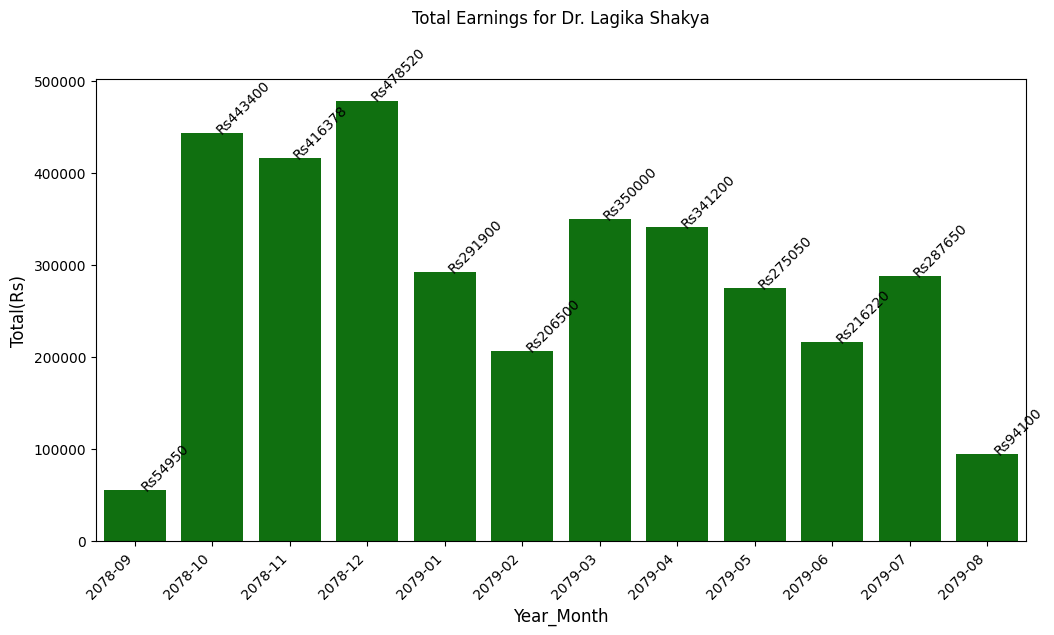

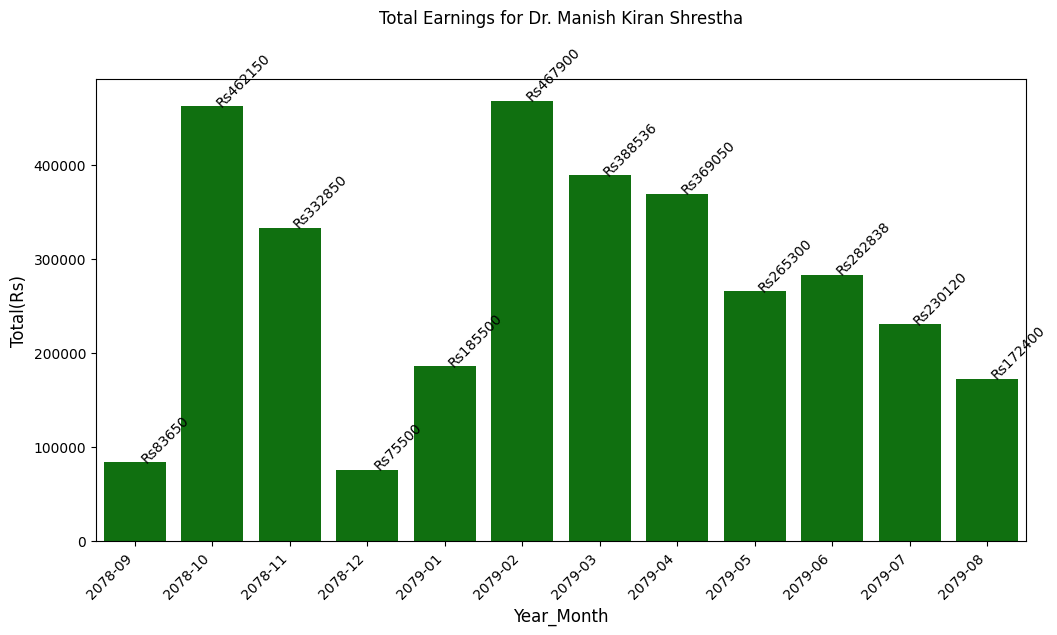

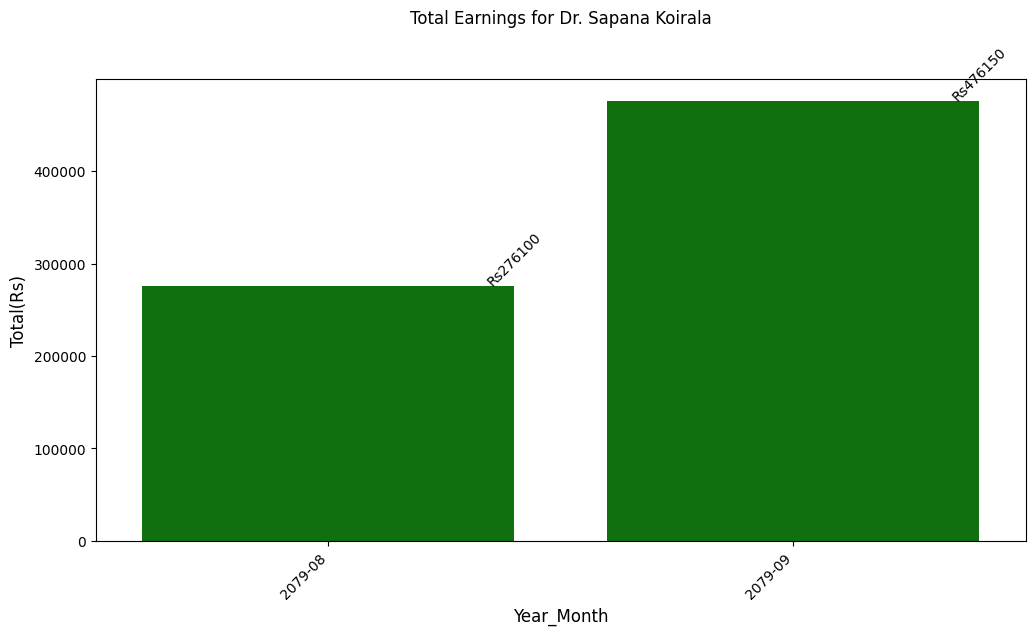

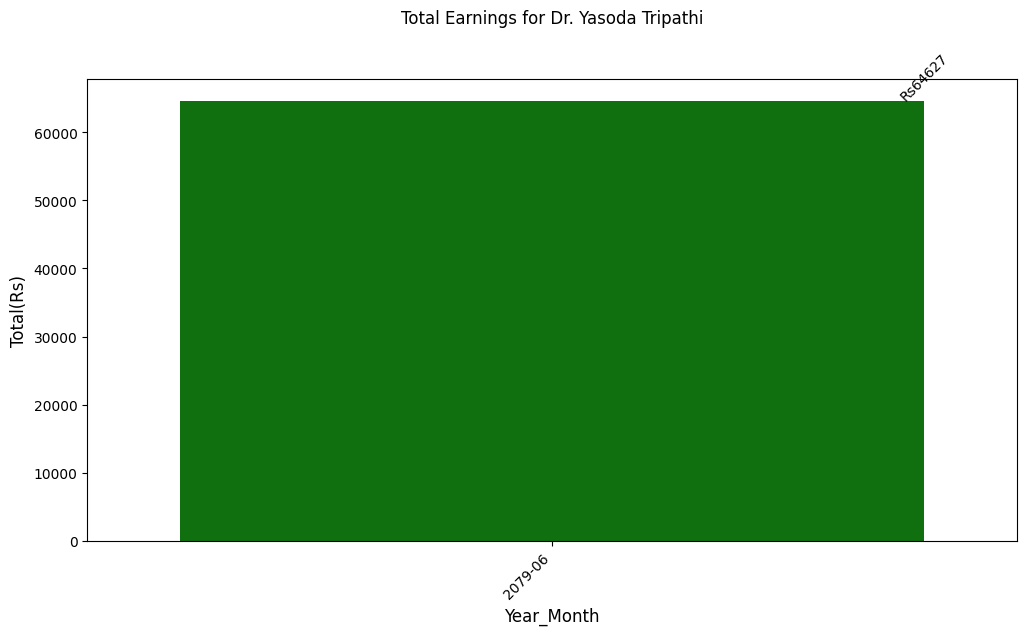

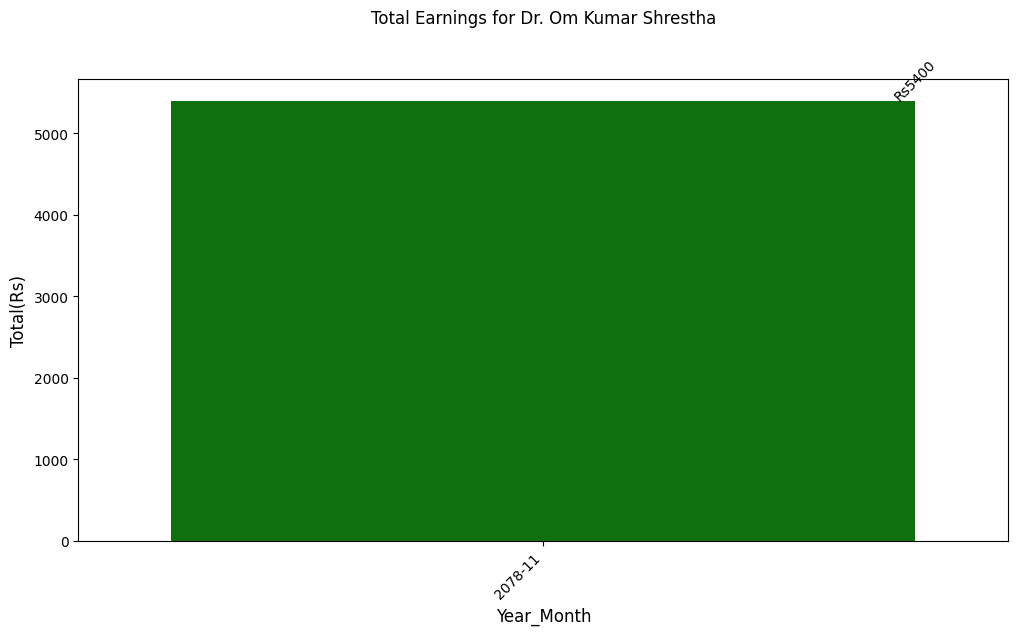

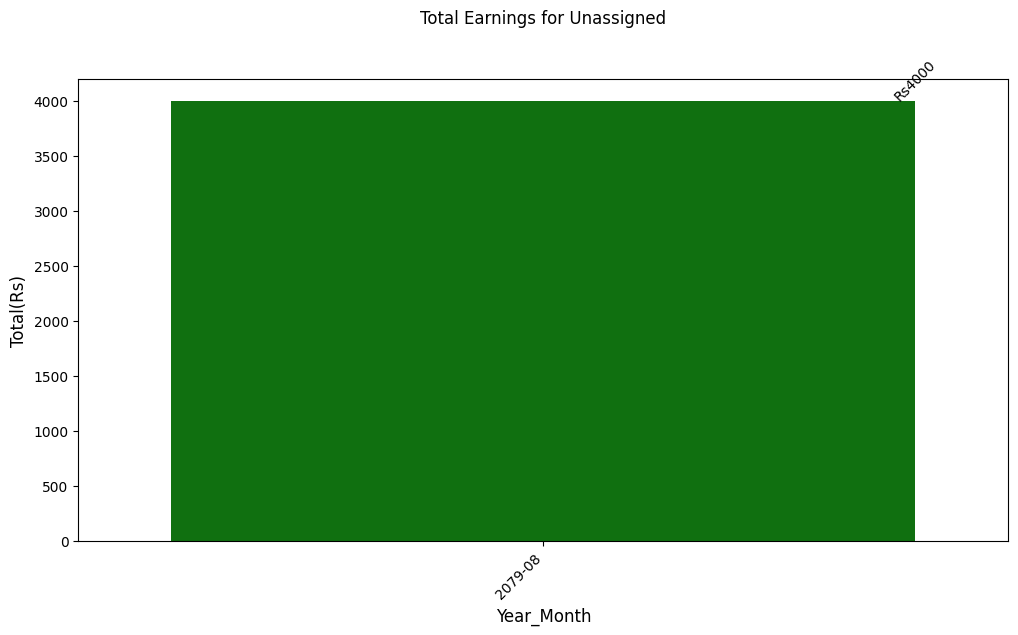

In [11]:
for pp in group_df['Performer'].unique():
    cc = group_dff[group_dff['Performer']==pp].drop(columns=['Performer'])
    cc.to_csv('earnings/total_earnings_'+pp+'.csv')
    cc = cc.sort_values(by='Year_Month')
    fig, ax = plt.subplots(figsize=(12, 6))
    chart = sns.barplot(x='Year_Month', y='Total', data=cc,ax =ax,color='green')
    plt.title('Total Earnings for ' + pp,pad=40)
    plt.ylabel('Total(Rs)', fontsize=12)
    plt.xlabel('Year_Month', fontsize=12)
    for p in ax.patches:
        num="Rs{:0.0f}".format( p.get_height())
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(num, (x, y),ha="center", rotation=45)
    ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.savefig('earnings/total_earnings_'+pp+'.png', bbox_inches = 'tight')
    
    plt.show()

In [12]:
def six_month(dd):
    if dd >= '2078-09-07' and dd <= '2079-03-06':
        return '2078-09-07 to 2079-03-06'
    elif dd > '2079-03-06' and dd < '2079-09-07':
        return '2079-03-07 to 2079-09-07'
    else:
        return '2079-09-07 beyond'
    
data['six_month_time'] = data['Date_Time'].apply(six_month)
data.head()

,Date_Time,Receipt No.,BillingType,VisitType,Hospital No.,Patient Name,Department,Item,Price,Qty,...,ReferenceReceiptNo,Disc. Scheme,IsInsurance?,exp_name,Surname,Year,Month,Year_Month,Day,six_month_time
0,2078-09-07 00:00:00,CRN-752,ReturnCashSales,outpatient,2103010197,Bhim Bahadur Thapa,CT-SCAN,HRCT CHEST,7000,1,...,BL-24565,General,NO,"[Bhim, Bahadur, Thapa]",Thapa,2078,09,2078-09,07,2078-09-07 to 2078-09-07
1,2078-09-08 00:00:00,BL-26047,CashSales,inpatient,2112018587,Amar Sing Gurung,CT-SCAN,HRCT CHEST COVID-19,8000,1,...,NaN,General,NO,"[Amar, Sing, Gurung]",Gurung,2078,09,2078-09,08,2078-09-07 to 2078-09-07
2,2078-09-25 00:00:00,BL-28160,CashSales,outpatient,2201019409,Chandra Gurung,CT-SCAN,CT HEAD PLAIN,4000,1,...,NaN,General,NO,"[Chandra, Gurung]",Gurung,2078,09,2078-09,25,2078-09-07 to 2078-09-07
3,2078-09-26 00:00:00,BL-28312,CashSales,outpatient,2201019405,Som Prasad Gurung,CT-SCAN,HRCT CHEST COVID-19,8000,1,...,NaN,General,NO,"[Som, Prasad, Gurung]",Gurung,2078,09,2078-09,26,2078-09-07 to 2078-09-07
4,2078-09-26 00:00:00,BL-28247,CashSales,outpatient,2201019431,Tulasi Rana,CT-SCAN,HRCT CHEST,7000,1,...,NaN,General,NO,"[Tulasi, Rana]",Rana,2078,09,2078-09,26,2078-09-07 to 2078-09-07


In [7]:
data['Prescriber'].unique()

array(['Dr. Badri Paudel', 'Dr. Klara Paudel', 'SELF',
       'Dr. Sharad Chandra Baral', 'Dr. Duty Doctor',
       'Dr. Nabin Raj Gautam', 'Dr. Dipak Maharjan',
       'Dr. Bishnu Bhandari', 'Dr. Ranjuna Thakali',
       'Dr. Prakash Chhetri', 'Dr. Kovid Nepal', 'Dr. S K Jayswal',
       'Dr. Pushpa Raj Koirala', 'Dr. Pradeep Kafle', 'Dr. Saroj Pokhrel',
       'Dr. Binod Raj Bhandari', 'Dr. Subin Byanjankar',
       'Dr. Dipendra Man Shrestha', 'Dr. Jamuna Gurung',
       'Dr. Santosh Adhikari', 'Dr. Kiran Sharma', 'Dr. Ashim Gurung',
       'Dr. Rajan Kumar Sharma', 'Dr. Manish Kiran Shrestha',
       'Dr. Bishnu Palikhe', 'Dr. Om Kumar Shrestha',
       'Dr. Ananda Bhattarai', 'Dr. Jhapindra Pokhrel',
       'Dr. Bishal Thapa', 'gandaki pradesh police hospita',
       'Dr. Yadu Nath Baral', 'Fewa city Hospital',
       'Dr.Chandra Bahadur Pun', 'Dr. Basanta Dhungana',
       'Dr. Sashmi Manandhar', 'Dr. Juju Raj Shrestha',
       'Dr. Bidhi Dhital', 'walefare', 'Dr. Amrit Rijal',
 

In [13]:
def Prescriber_Cat(dd):
    if dd.lower().__contains__("hospita") or dd.lower() == ("gmc") :
        return 'Hospital Referral'
    elif dd == "Self":
        return 'Self'
    elif dd in (str(['Dr. Bishnu Bhandari','Dr. Duty Doctor','Dr. Santosh Adhikari'])):
        return 'ER'
    else:
        return 'All Other'
    
data['Prescriber_Category'] = data['Prescriber'].apply(Prescriber_Cat)
data.head()

,Date,Receipt No.,BillingType,VisitType,Hospital No.,Patient Name,Department,Item,Price,Qty,...,Discount,Total,User Name,Performer,Prescriber,Remarks,ReferenceReceiptNo,Disc. Scheme,IsInsurance?,Prescriber_Category
0,2078-09-07 00:00:00,CRN-752,ReturnCashSales,outpatient,2103010197,Bhim Bahadur Thapa,CT-SCAN,HRCT CHEST,7000,1,...,0.0,7000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,Dr. Badri Paudel,ct not done because of machine problem,BL-24565,General,NO,All Other
1,2078-09-08 00:00:00,BL-26047,CashSales,inpatient,2112018587,Amar Sing Gurung,CT-SCAN,HRCT Chest Covid-19,8000,1,...,0.0,8000.0,Ms. SHRISHTI LAMCHHANE,Dr. Manish Kiran Shrestha,Dr. Klara Paudel,NaN,NaN,General,NO,All Other
2,2078-09-25 00:00:00,BL-28160,CashSales,outpatient,2201019409,Chandra Gurung,CT-SCAN,CT HEAD PLAIN,4000,1,...,0.0,4000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,SELF,NaN,NaN,General,NO,All Other
3,2078-09-26 00:00:00,BL-28312,CashSales,outpatient,2201019405,Som Prasad Gurung,CT-SCAN,HRCT Chest Covid-19,8000,1,...,0.0,8000.0,Ms. Sirma Gurung,Dr. Manish Kiran Shrestha,Dr. Sharad Chandra Baral,NaN,NaN,General,NO,All Other
4,2078-09-26 00:00:00,BL-28247,CashSales,outpatient,2201019431,Tulasi Rana,CT-SCAN,HRCT CHEST,7000,1,...,0.0,7000.0,Ms. DIPA LABHAJU,Dr. Manish Kiran Shrestha,Dr. Duty Doctor,NaN,NaN,General,NO,ER


In [13]:
data_nw = data[data['BillingType'].isin(['CashSales', 'CreditSales'])]
group_df = data_nw.groupby(['VisitType', 'Performer','six_month_time']).agg({'Total': 'sum'})
group_df = group_df.reset_index()
group_df.head()

,VisitType,Performer,six_month_time,Total
0,emergency,Dr. Lagika Shakya,2079-03-07 to 2079-09-07,4275.000000
1,emergency,Dr. Manish Kiran Shrestha,2078-09-07 to 2078-09-07,4000.000000
2,inpatient,Dr. Lagika Shakya,2078-09-07 to 2078-09-07,395598.436351
3,inpatient,Dr. Lagika Shakya,2079-03-07 to 2079-09-07,623995.000000
4,inpatient,Dr. Manish Kiran Shrestha,2078-09-07 to 2078-09-07,403100.000000


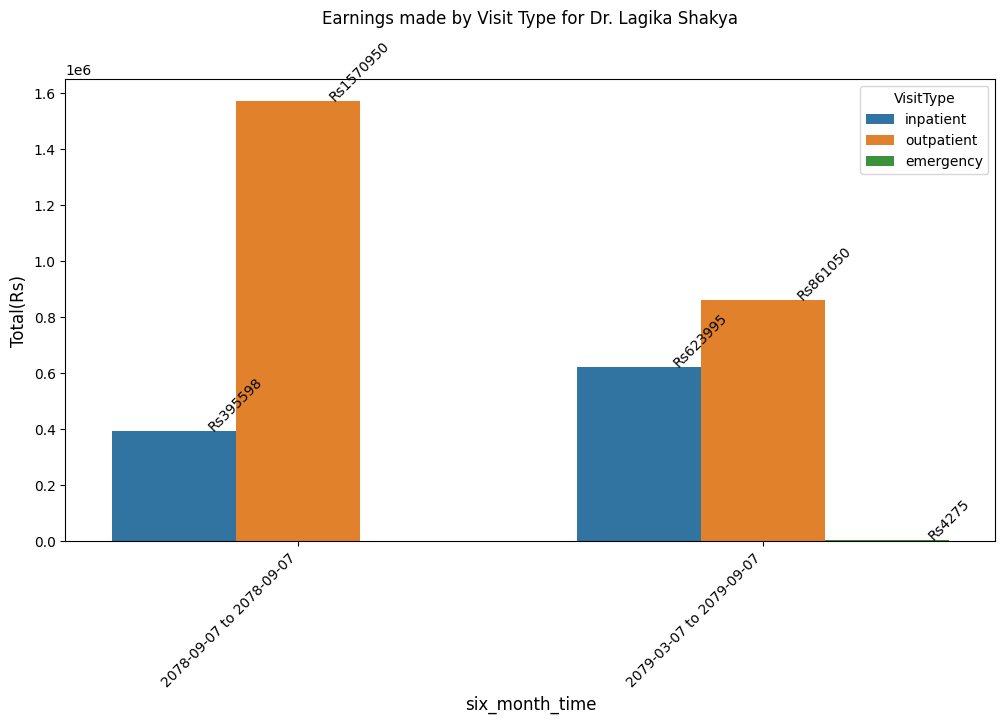

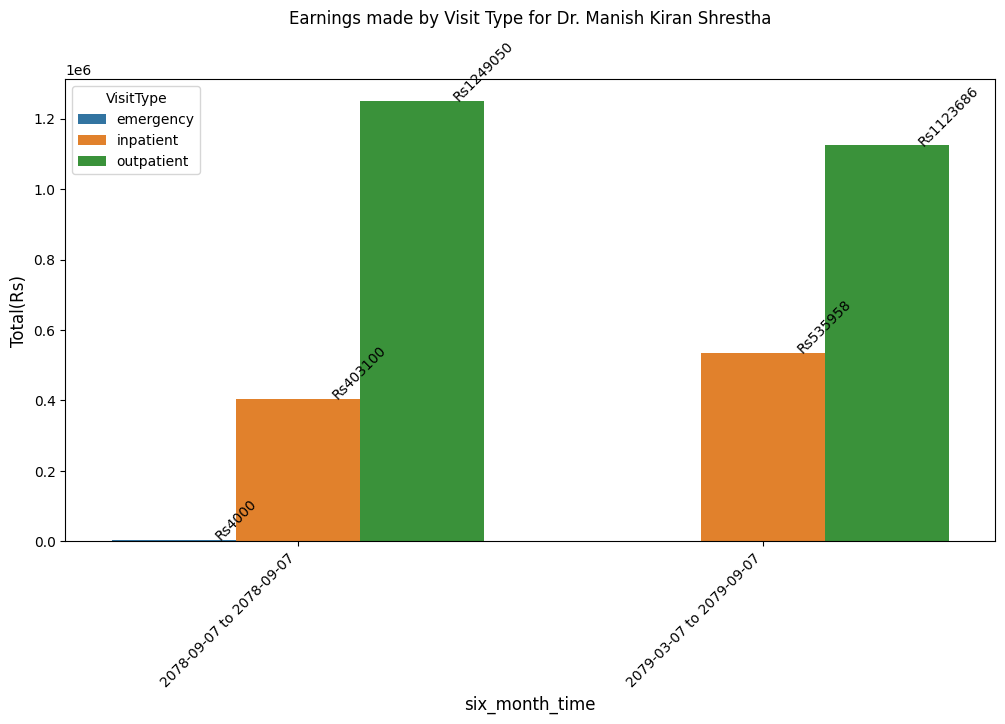

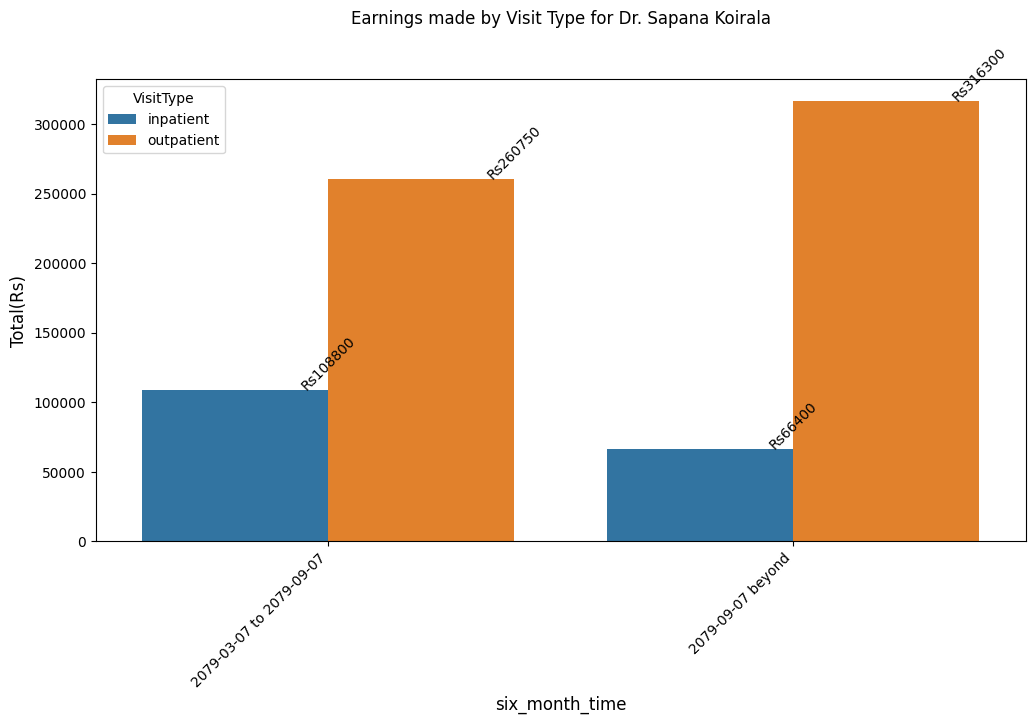

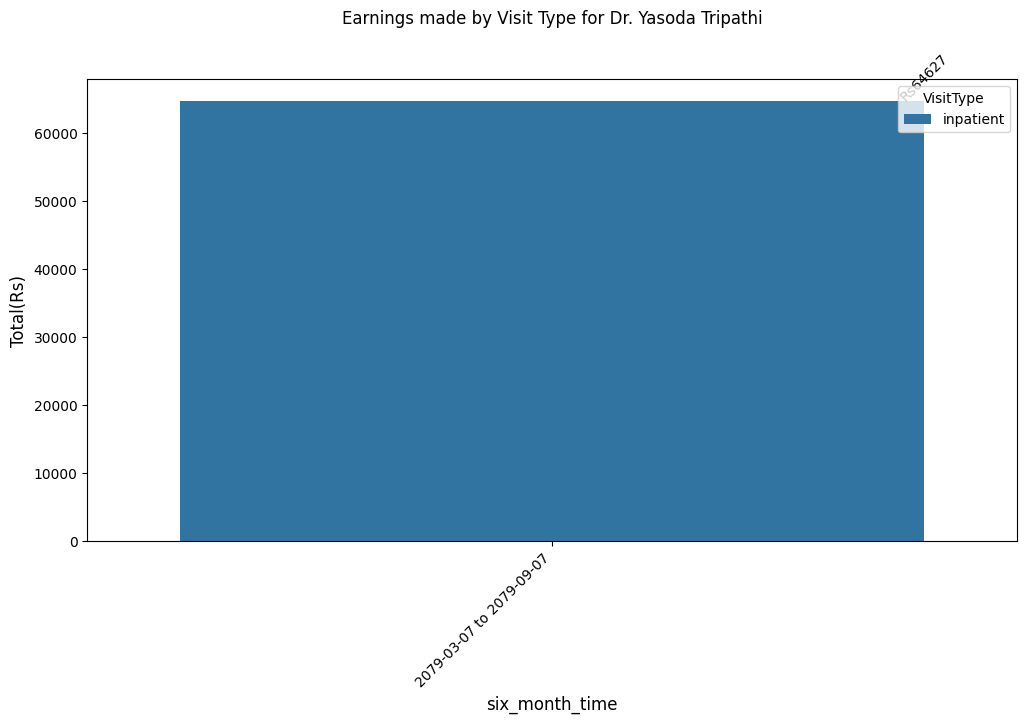

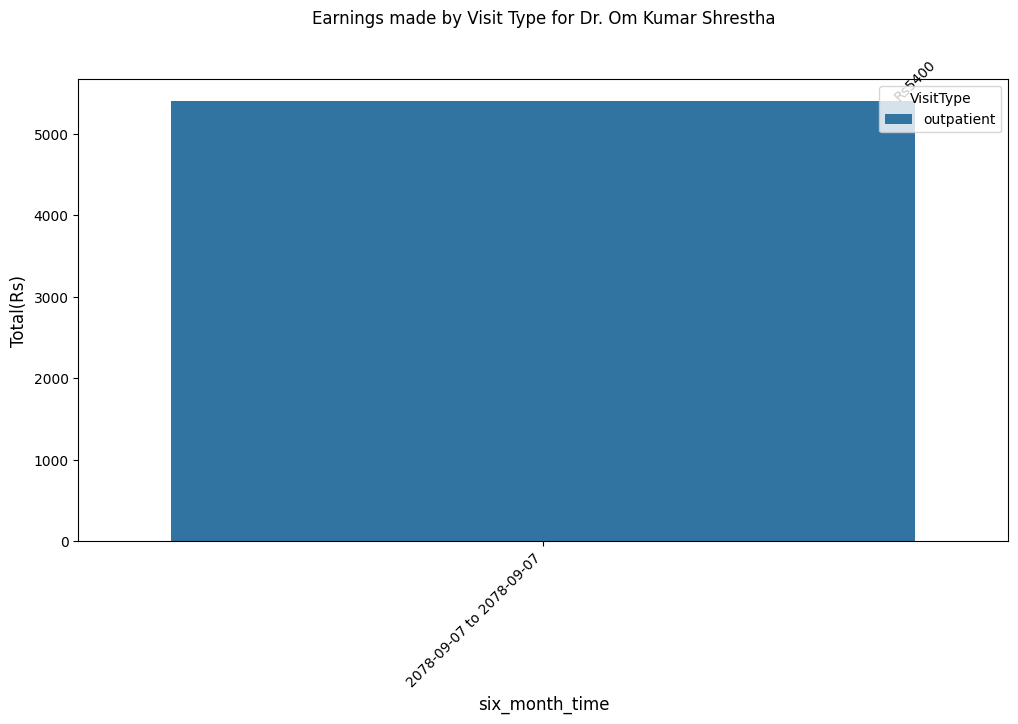

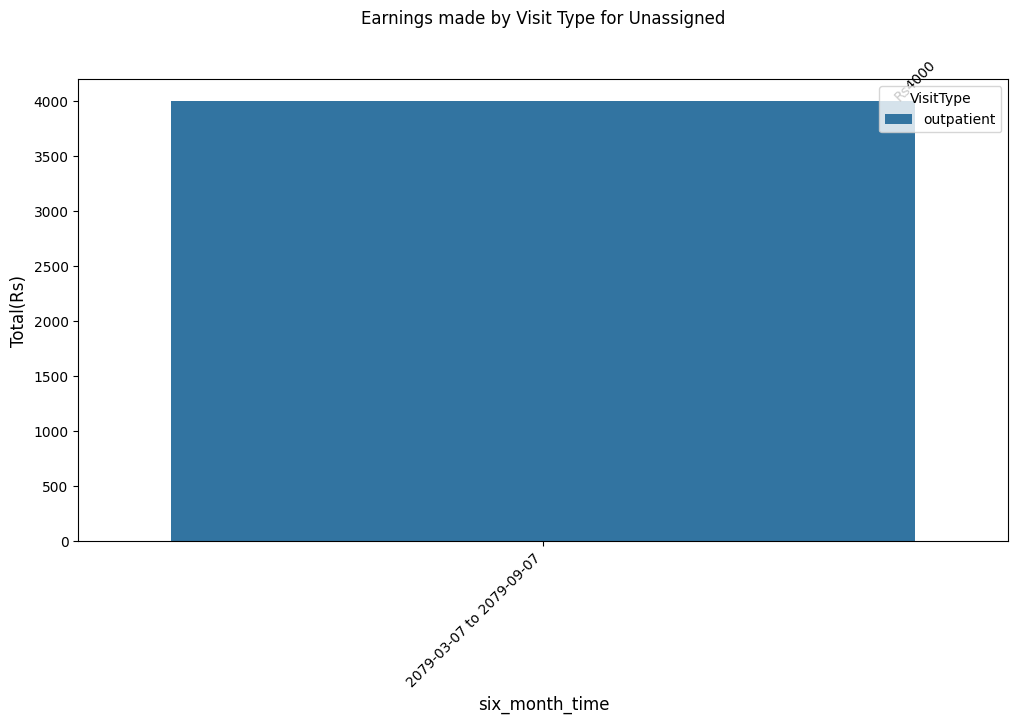

In [14]:
for pp in group_df['Performer'].unique():
    bb = group_df[group_df['Performer']==pp].drop(columns=['Performer'])
    bb = bb.sort_values(by='six_month_time')
    
    bb.to_csv('earnings/six_month_time_visit_type_earnings_'+pp+'.csv')
    fig, ax = plt.subplots(figsize=(12, 6))
    chart = sns.barplot(x='six_month_time', y='Total', hue='VisitType', data=bb,ax =ax)
    plt.title('Earnings made by Visit Type for ' + pp,pad=40)
    plt.ylabel('Total(Rs)', fontsize=12)
    plt.xlabel('six_month_time', fontsize=12)
    for p in ax.patches:
        num="Rs{:0.0f}".format( p.get_height())
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(num, (x, y),ha="center", rotation=45)
    ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.savefig('earnings/six_month_time_visit_type_earnings_'+pp+'.png', bbox_inches = 'tight')
    plt.show()

In [15]:
data_nw = data[data['BillingType'].isin(['CashSales', 'CreditSales'])]
group_dff = data_nw.groupby(['Performer','six_month_time']).agg({'Total': 'sum'})
group_dff = group_dff.reset_index()
group_dff.head()

,Performer,six_month_time,Total
0,Dr. Lagika Shakya,2078-09-07 to 2078-09-07,1.966548e+06
1,Dr. Lagika Shakya,2079-03-07 to 2079-09-07,1.489320e+06
2,Dr. Manish Kiran Shrestha,2078-09-07 to 2078-09-07,1.656150e+06
3,Dr. Manish Kiran Shrestha,2079-03-07 to 2079-09-07,1.659644e+06
4,Dr. Om Kumar Shrestha,2078-09-07 to 2078-09-07,5.400000e+03


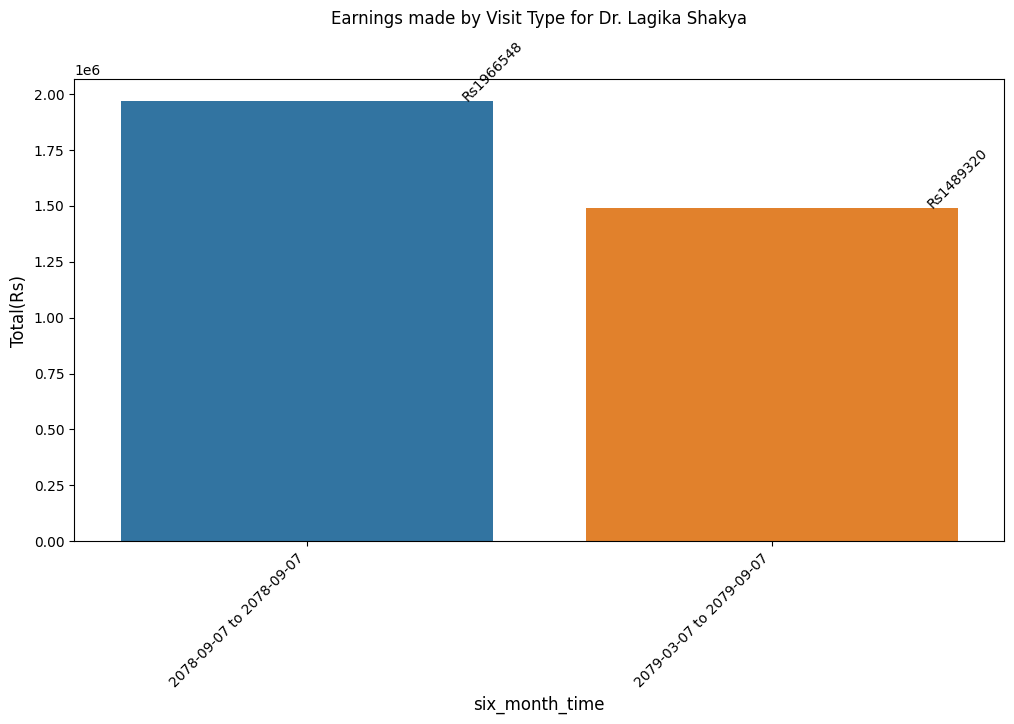

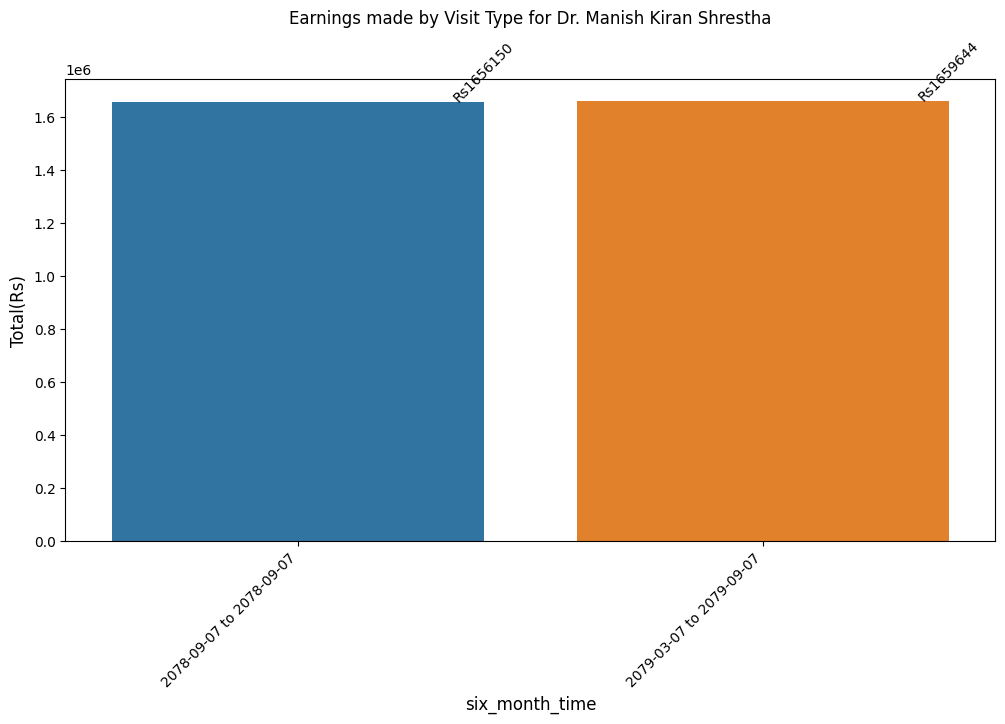

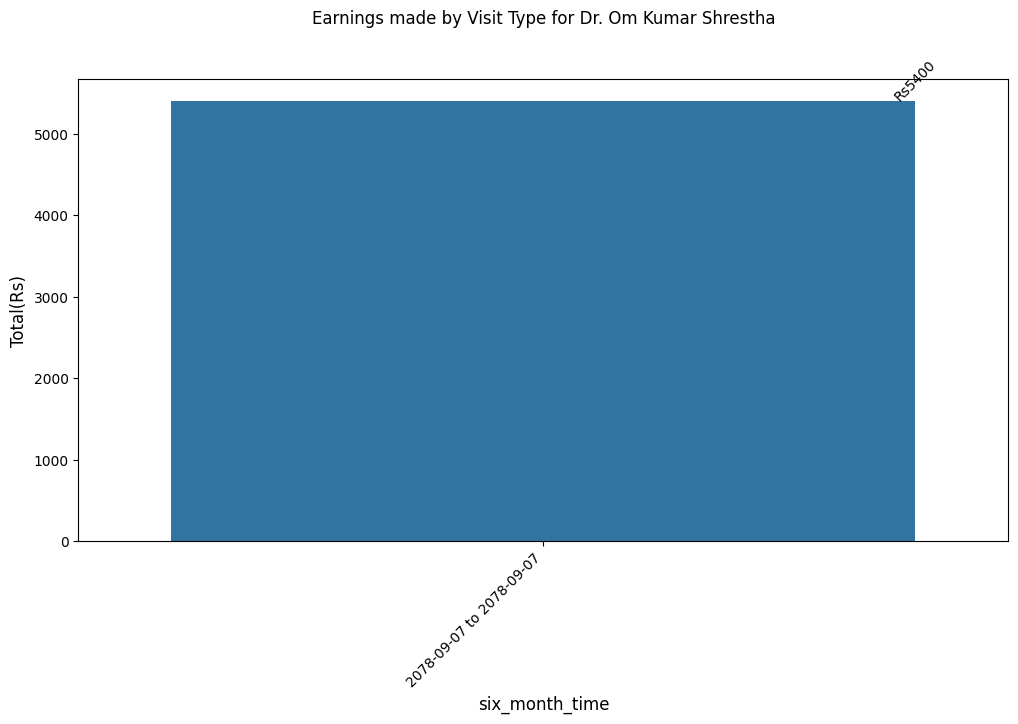

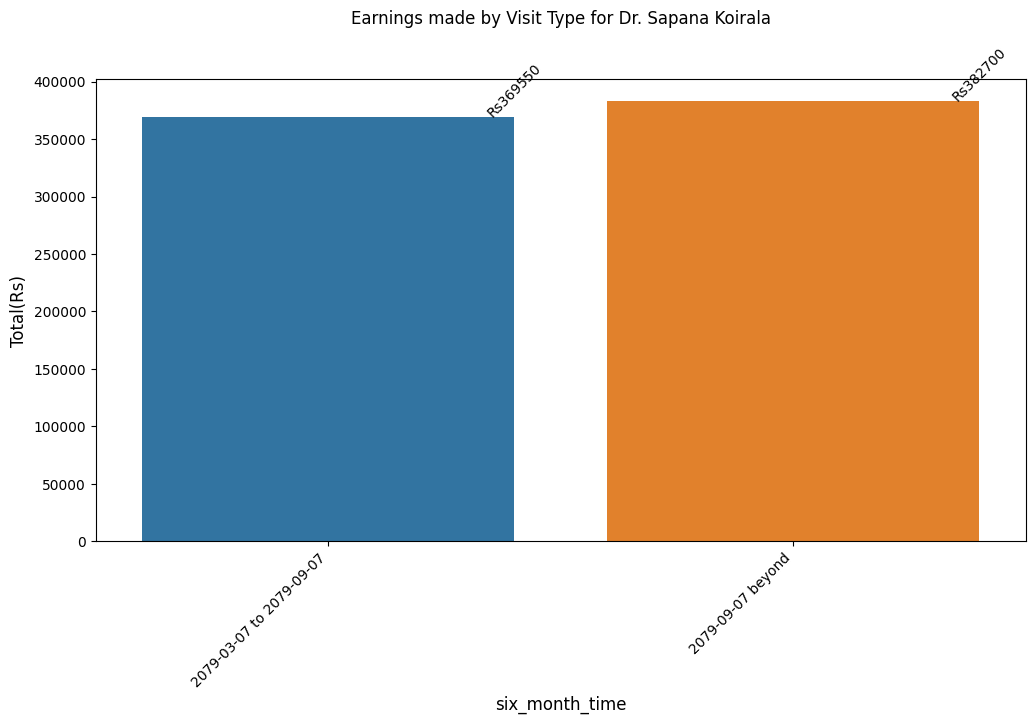

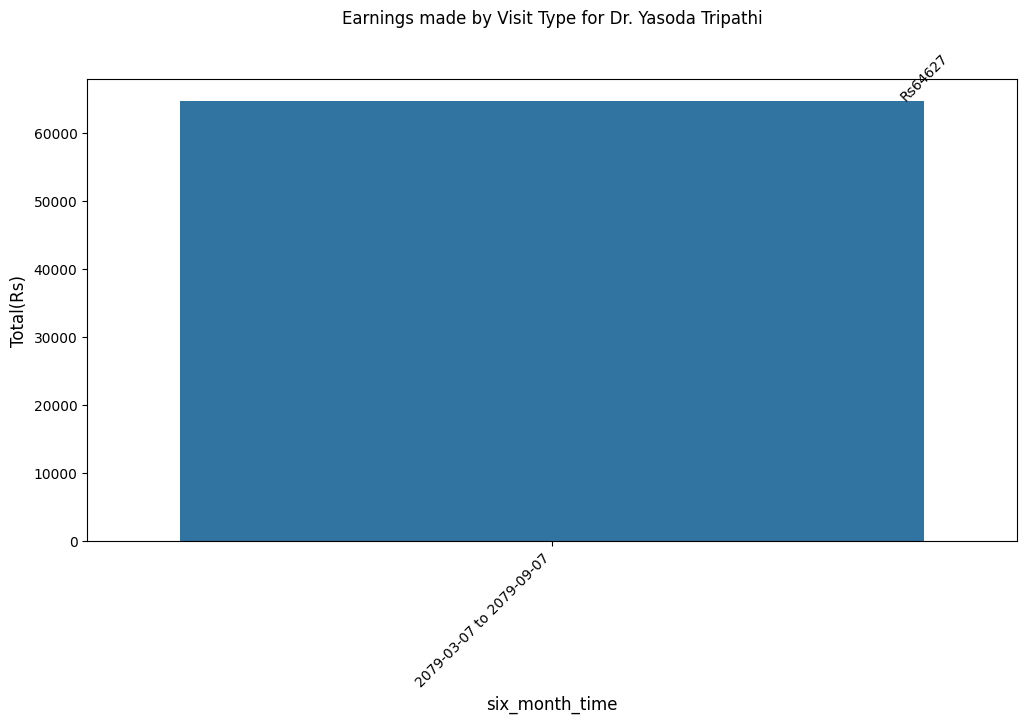

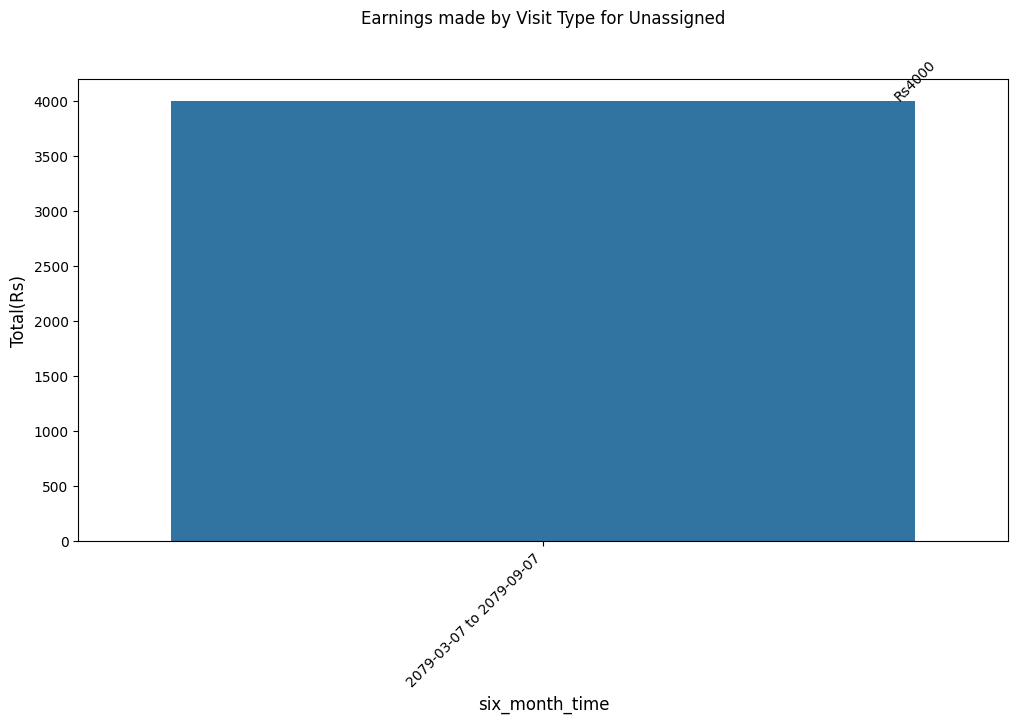

In [16]:
for pp in group_dff['Performer'].unique():
    bb = group_dff[group_dff['Performer']==pp].drop(columns=['Performer'])
    bb = bb.sort_values(by='six_month_time')
    bb.to_csv('six_month_time_earnings_'+pp+'.csv')
    fig, ax = plt.subplots(figsize=(12, 6))
    chart = sns.barplot(x='six_month_time', y='Total', data=bb,ax =ax)
    plt.title('Earnings made by Visit Type for ' + pp,pad=40)
    plt.ylabel('Total(Rs)', fontsize=12)
    plt.xlabel('six_month_time', fontsize=12)
    for p in ax.patches:
        num="Rs{:0.0f}".format( p.get_height())
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(num, (x, y),ha="center", rotation=45)
    
    ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.savefig('earnings/six_month_time_earnings_'+pp+'.png', bbox_inches = 'tight')
    plt.show()